# Combined Dataset Preprocessing

To load all the images used in the model, a specific directory structure must be followed to take advantage of some features of Keras.

Both datasets can be loaded in two different ways. The first method is to download a JSON file that includes the following fields: data, label, scene_ids, and location lists. The second method is to download all the images. The filename of each image has the following format: {label}_{scene id}_{longitude}_{latitude}.png. For this project, the second method will be used for educational purposes.

The goal of the project is to create a simple Convolutional Neural Network that can detect whether a satellite image includes a plane, a ship, or neither. For this reason, the 'scene id', 'longitude,' and 'latitude' features will not be considered for the training of the Neural Network. However, it would be interesting to test in a future project if these attributes can somehow be included in the training to improve the accuracy.

Since the images in both datasets have different sizes, the images in 'Ships in Satellite Imagery' will be resized from 80x80 px to 20x20 px, which is the size of the images in 'Planes in Satellite Imagery.'

In [71]:
import os
%ls

LICENSE               dataset/              requirements.txt
README.md             model-airplane.ipynb  venv/
combined-dataset/     pre-airplane.ipynb
combined-model.ipynb  pre-combined.ipynb


## Create Directory Structure

The following directory structure will be created to automatically load all the images using Keras:

- combined-dataset
    - training-data
        - class_0
        - class_1
        - class_2
    - test-data
        - class_0
        - class_1
        _ class_2

### Meaning of Each Class

- class_0 (images without a plane or a ship)
- class_1 (images with a plane)
- class_2 (images with a ship)

In [72]:
def make_dir(path):
    if not os.path.isdir(path):
       os.makedirs(path)

In [73]:
make_dir('./combined-dataset/training-data')
make_dir('./combined-dataset/training-data/class_0')
make_dir('./combined-dataset/training-data/class_1')
make_dir('./combined-dataset/training-data/class_2')
make_dir('./combined-dataset/test-data/class_0')
make_dir('./combined-dataset/test-data/class_1')
make_dir('./combined-dataset/test-data/class_2')

In [74]:
%ls combined-dataset/

planes/        ships/         test-data/     training-data/


In [75]:
%ls combined-dataset/test-data

class_0/ class_1/ class_2/


In [76]:
%ls combined-dataset/training-data

class_0/ class_1/ class_2/


In [77]:
img_name_planes = os.listdir('./combined-dataset/planes/planesnet/planesnet')[0]
img_name_planes

'1__20170620_175442_0e30__-118.40972173523741_33.94610057751408.png'

In [78]:
img_name_ships = os.listdir('./combined-dataset/ships/shipsnet/shipsnet')[0]
img_name_ships

'0__20180708_180908_0f47__-118.14880745980487_33.73008948438861.png'

In [79]:
cwd = os.getcwd()

In [80]:
from PIL import Image

img_planes = Image.open(f'./combined-dataset/planes/planesnet/planesnet/{img_name_planes}')
img_ships = Image.open(f'./combined-dataset/ships/shipsnet/shipsnet/{img_name_ships}')

print('Images General Information')
print(f'Planes img -> size = {img_planes.size}, format = {img_planes.format}, mode = {img_planes.mode}')
print(f'Ships img -> size = {img_ships.size}, format = {img_ships.format}, mode = {img_ships.mode}')

Images General Information
Planes img -> size = (20, 20), format = PNG, mode = RGB
Ships img -> size = (80, 80), format = PNG, mode = RGB


## Move Images to Correct Directory

To properly allocate the images into the correct directories, it is important to allocate 20% of the images to the test dataset. However, it is not possible to simply take the first or last 20% of the images, since they are ordered based on their filenames. Filenames beginning with '0_' come before those with the prefix '1_'. One possible solution is to move 1 image from every 4 with the same class to the test dataset.

The following table shows the number of images in the training and test datasets. It is important to note that the training dataset will be split again to create a validation dataset.

In [81]:
train_c0_idx, test_c0_idx = 1, 1
train_c1_idx, test_c1_idx = 1, 1
move_next_c0, move_next_c1 = False, False

# Planes dataset
for image in os.listdir('./combined-dataset/planes/planesnet/planesnet/'):
    if image[0] == '0':
        if move_next_c0:
            os.rename(f'{cwd}/combined-dataset/planes/planesnet/planesnet/{image}',
                  f'{cwd}/combined-dataset/test-data/class_0/0_image_{test_c0_idx}.png')
            test_c0_idx += 1
            move_next_c0 = False
            continue
        os.rename(f'{cwd}/combined-dataset/planes/planesnet/planesnet/{image}',
                  f'{cwd}/combined-dataset/training-data/class_0/0_image_{train_c0_idx}.png')
        train_c0_idx += 1
        if train_c0_idx % 4 == 0:
            move_next_c0 = True
    else:
        if move_next_c1:
            os.rename(f'{cwd}/combined-dataset/planes/planesnet/planesnet/{image}',
                  f'{cwd}/combined-dataset/test-data/class_1/1_image_{test_c1_idx}.png')
            test_c1_idx += 1
            move_next_c1 = False
            continue
        os.rename(f'{cwd}/combined-dataset/planes/planesnet/planesnet/{image}',
                  f'{cwd}/combined-dataset/training-data/class_1/1_image_{train_c1_idx}.png')
        train_c1_idx += 1
        if train_c1_idx % 4 == 0:
            move_next_c1 = True

The first dataset is conformed of 32,000 images. To check that the previous migration was done correctly, it is possible to get the number of files in all of the directories and the sum of these values should be equal to 32,000.

In [82]:
num_img_train_c0 = len(os.listdir('./combined-dataset/training-data/class_0'))
num_img_test_c0 = len(os.listdir('./combined-dataset/test-data/class_0'))
num_img_train_c1 = len(os.listdir('./combined-dataset/training-data/class_1'))
num_img_test_c1 = len(os.listdir('./combined-dataset/test-data/class_1'))

print(f'Num images training-data class 0: {num_img_train_c0}')
print(f'Num images test-data class 0: {num_img_test_c0}')
print(f'Num images training-data class 1: {num_img_train_c1}')
print(f'Num images test-data class 1: {num_img_test_c1}')

assert num_img_train_c0 + num_img_test_c0 == 24000
assert num_img_train_c1 + num_img_test_c1 == 8000
assert num_img_train_c0 + num_img_test_c0 + num_img_train_c1 + num_img_test_c1 == 32000

Num images training-data class 0: 19200
Num images test-data class 0: 4800
Num images training-data class 1: 6400
Num images test-data class 1: 1600


One important considerantion for the ship dataset is that all of the images that don't include a ship will be moved to the class_0 directories. Also, before moving any image it is necessary to resize it to 20x20 px. The following code is a test to resize an image.

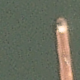

In [83]:
img_ships

In [84]:
resized_image = img_ships.resize((20, 20), Image.LANCZOS)
resized_image

In [85]:
train_c2_idx, test_c2_idx = 1, 1
move_next_c2 = False

# Ships dataset
for image in os.listdir('./combined-dataset/ships/shipsnet/shipsnet/'):
    new_image = Image.open(f'{cwd}/combined-dataset/ships/shipsnet/shipsnet/{image}')
    new_image = new_image.resize((20, 20), Image.LANCZOS)
    if image[0] == '0':
        if move_next_c0:
            new_image.save(f'{cwd}/combined-dataset/test-data/class_0/0_image_{test_c0_idx}.png')
            test_c0_idx += 1
            move_next_c0 = False
            continue
        new_image.save(f'{cwd}/combined-dataset/training-data/class_0/0_image_{train_c0_idx}.png')
        train_c0_idx += 1
        if train_c0_idx % 4 == 0:
            move_next_c0 = True
    else:
        if move_next_c2:
            new_image.save(f'{cwd}/combined-dataset/test-data/class_2/2_image_{test_c2_idx}.png')
            test_c2_idx += 1
            move_next_c2 = False
            continue
        new_image.save(f'{cwd}/combined-dataset/training-data/class_2/2_image_{train_c2_idx}.png')
        train_c2_idx += 1
        if train_c2_idx % 4 == 0:
            move_next_c2 = True

In [86]:
num_img_train_c0 = len(os.listdir('./combined-dataset/training-data/class_0'))
num_img_test_c0 = len(os.listdir('./combined-dataset/test-data/class_0'))
num_img_train_c2 = len(os.listdir('./combined-dataset/training-data/class_2'))
num_img_test_c2 = len(os.listdir('./combined-dataset/test-data/class_2'))

print(f'Num images training-data class 0: {num_img_train_c0}')
print(f'Num images test-data class 0: {num_img_test_c0}')
print(f'Num images training-data class 2: {num_img_train_c2}')
print(f'Num images test-data class 2: {num_img_test_c2}')

Num images training-data class 0: 21600
Num images test-data class 0: 5400
Num images training-data class 2: 800
Num images test-data class 2: 200


In [87]:
total_num_img = num_img_train_c0 + num_img_test_c0 + num_img_train_c1 + num_img_test_c1 + num_img_train_c2 + num_img_test_c2
assert num_img_train_c0 + num_img_test_c0 - 24000 == 3000
assert num_img_train_c2 + num_img_test_c2 == 1000
assert total_num_img == 36000
